<a href="https://colab.research.google.com/github/Amrit007-droid/DataEDA/blob/main/Indian_Premier_League_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis - IPL***

## *Objective :*

### *1.   As a sports analysts, find out the most successful teams, players and factors*
### *contributing win or loss of a team.*
### *2.   Suggest teams or players a company should endorse for its products.*




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)                  # sets the maximum number of rows displayed to 500.
pd.set_option('display.max_columns', 500)               # sets the maximum number of columns displayed to 500.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Sparks foundation Internship/deliveries.csv'
deliveries_df = pd.read_csv(file_path)

new_file_path = '/content/drive/MyDrive/Sparks foundation Internship/matches.csv'
matches_df = pd.read_csv(new_file_path)

In [ ]:
deliveries_df.shape

(179078, 21)

In [ ]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches_df.shape

(756, 18)

In [ ]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### We are dealing with two datasets: one, `deliveries_df`, which provides detailed ball-to-ball information for every match since the inception of the IPL, and the other, `matches_df`, containing comprehensive details about each match from the beginning of the IPL.

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.date = pd.to_datetime(matches_df['date'])

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### If there's information in the "Player Dismissed," "Dismissal Kind," and "Fielder" categories, it means a wicket was taken. On the other hand, if these fields are empty (null), it means there was no wicket at that time.

In [ ]:
matches_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches_df[matches_df.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


### Null values in the "Winner" column indicate instances where matches were halted due to rain, technical issues, or other reasons, resulting in no decisive outcome.

In [ ]:
list(deliveries_df.columns)

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [ ]:
list(matches_df.columns)

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

## *Merging both the datasets to one*

In [ ]:
ipl_df = pd.merge(deliveries_df, matches_df, how='left', left_on ='match_id', right_on ='id', left_index = False, right_index = False)

In [ ]:
ipl_df.shape

(179078, 39)

In [ ]:
ipl_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [ ]:
ipl_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### *Dropping some columns that are not required for our present analysis.*

In [ ]:
ipl_df = ipl_df.drop(['team2', 'id', 'venue', 'umpire1', 'umpire2', 'umpire3', 'penalty_runs'],axis = 1)

In [ ]:
ipl_df.shape

(179078, 32)

## ***SEASON WISE STATS***

In [ ]:
season = ipl_df['season'].unique()    #helps to quickly identify and list all unique seasons present in the 'season' column.
season.sort()
print(season)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


### *Season Winners*

In [ ]:
winners = []
for i in season:
  winners.append(matches_df[matches_df.season == i].iloc[-1:,-8].values[0])

season_winners = pd.DataFrame({'Season':season, 'Winners':winners})
season_winners

,Season,Winners
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


### *Visualization of 'Season Winners'*

In [ ]:
# Using Plotly -
data = {
    'Season': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Winners': [
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Chennai Super Kings',
        'Kolkata Knight Riders', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians',
        'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians'
    ]
}

df = pd.DataFrame(data)
custom_colors = ['#FF5733', '#FFC300', '#33FF57', '#339CFF', '#9533FF', '#FF33E6']
fig = px.bar(df, x= 'Winners', y='Season', color='Winners',color_discrete_sequence = custom_colors)
fig.update_layout(title='IPL Winners Over The Years')
fig.update_yaxes(categoryorder='total ascending')
fig.show()

In [ ]:
fig = px.histogram(df, x='Winners', color='Winners', color_discrete_sequence=custom_colors,
                   title='Count Plot of IPL Winners Over The Years')

fig.update_layout(xaxis=dict(tickangle=45))                             #adjusting the appearance.
fig.show()

## *MUMBAI INDIANS stands out as the most successful team, having secured victories in the majority of the seasons.*

## *ORANGE CAP HOLDERS*

In [ ]:
for i in season:
    print('Season: ', i)
    print(ipl_df[ipl_df.season == i].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(1))

Season:  2008
batsman
SE Marsh    616
Name: batsman_runs, dtype: int64
Season:  2009
batsman
ML Hayden    572
Name: batsman_runs, dtype: int64
Season:  2010
batsman
SR Tendulkar    618
Name: batsman_runs, dtype: int64
Season:  2011
batsman
CH Gayle    608
Name: batsman_runs, dtype: int64
Season:  2012
batsman
CH Gayle    733
Name: batsman_runs, dtype: int64
Season:  2013
batsman
MEK Hussey    733
Name: batsman_runs, dtype: int64
Season:  2014
batsman
RV Uthappa    660
Name: batsman_runs, dtype: int64
Season:  2015
batsman
DA Warner    562
Name: batsman_runs, dtype: int64
Season:  2016
batsman
V Kohli    973
Name: batsman_runs, dtype: int64
Season:  2017
batsman
DA Warner    641
Name: batsman_runs, dtype: int64
Season:  2018
batsman
KS Williamson    747
Name: batsman_runs, dtype: int64
Season:  2019
batsman
DA Warner    727
Name: batsman_runs, dtype: int64


In [ ]:
data = {
    'Season': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Batsman': ['SE Marsh', 'ML Hayden', 'SR Tendulkar', 'CH Gayle', 'CH Gayle', 'MEK Hussey',
                'RV Uthappa', 'DA Warner', 'V Kohli', 'DA Warner', 'KS Williamson', 'DA Warner'],
    'Runs': [616, 572, 618, 608, 733, 733, 660, 562, 973, 641, 747, 727]
}

df = pd.DataFrame(data)

# Creating a bar chart using Plotly Express
fig = px.bar(df, x='Season', y='Runs', color='Batsman', title='Top Run-Scorer in Each IPL Season',
             labels={'Runs': 'Runs Scored', 'Batsman': 'Batsman Name '},
             color_discrete_sequence=px.colors.qualitative.Bold)

# Adding a legend and adjusting layout
fig.update_layout(legend_title_text='Batsman', xaxis_title='Season', yaxis_title='Runs Scored')

fig.show()

## *We can observe from this chart that "VIRAT KOHLI" holds the record for the 'Highest Runs' scored in a single IPL season, achieving an impressive total of 973 runs.*

In [ ]:
fig = px.histogram(df, x='Batsman', color='Batsman', color_discrete_sequence=px.colors.qualitative.Set1,
                   title='Count Plot of IPL Top-Runscorer Over The Years')

fig.update_layout(xaxis=dict(tickangle=45))                             #adjusting the appearance.
fig.show()

## *We can observe from this chart that "DAVID WARNER" is the Most Successful IPL Batsman having Top-Scored in Three editions of IPL (2015, 2017, 2019), followed by "CHRIS GAYLE" who Top-scored in Two editions of IPL(2011, 2012).*

# *Highest run scorer of all time.*

In [ ]:
ipl_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [ ]:
# Visualizing the above data using Plotly--
data = {
    'Batsman': ['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan',
                'CH Gayle', 'MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir'],
    'Runs': [5434, 5415, 4914, 4741, 4632, 4560, 4477, 4446, 4428, 4223]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Batsman', y='Runs', title='Top Run Scorers in IPL',
             labels={'Runs': 'Total Runs', 'Batsman': 'Batsmen Name: '},
             color='Runs', color_continuous_scale='rainbow')

fig.update_layout(xaxis_title='Batsmen', yaxis_title='Total Runs',
                  xaxis={'categoryorder':'total descending'})

fig.show()

## *This graph highlights that "VIRAT KOHLI" holds the record for the Highest number of runs in IPL Cricket history, with 5434 runs, closely followed by "SURESH RAINA" with 5415 runs.*

# *Record for the most SIXES (6's) in IPL history.*

In [ ]:
ipl_df[ipl_df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

In [ ]:
# Visualizing the above data using Plotly--
data = {
    'Batsman': ['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'SK Raina', 'RG Sharma',
                'V Kohli', 'DA Warner', 'SR Watson', 'KA Pollard', 'YK Pathan'],
    'Sixes': [327, 214, 207, 195, 194, 191, 181, 177, 175, 161]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Batsman', y='Sixes', title='Top Six hitters in IPL',
             labels={'Sixes': 'Total Sixes', 'Batsman': 'Batsmen Name: '},
             color='Sixes', color_continuous_scale='sunsetdark')

fig.update_layout(xaxis_title='Batsmen', yaxis_title='Total Sixes',
                  xaxis={'categoryorder':'total descending'})

fig.show()


## *This chart emphasizes that "CHRIS GAYLE" holds the record for the highest number of sixes in the history of IPL cricket, having hit 327 sixes.*

# *Record for most FOURS (4's) in IPL History*

In [ ]:
ipl_df[ipl_df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10)

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64

In [ ]:
# Visualizing the above data using plotly--
data = {
    'Batsman': ['S Dhawan', 'SK Raina', 'G Gambhir', 'V Kohli', 'DA Warner',
                'RV Uthappa', 'RG Sharma', 'AM Rahane', 'CH Gayle', 'PA Patel'],
    'Fours': [526, 495, 492, 482, 459, 436, 431, 405, 376, 366]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Batsman', y='Fours', title='Top Four hitters in IPL',                 # Creating a Bar plot
             labels={'Fours': 'Total Fours', 'Batsman': 'Batsmen Name '},
             color='Fours', color_continuous_scale='sunset')

fig.update_layout(xaxis_title='Batsmen', yaxis_title='Total Fours',                      # Customizing the layout
                  xaxis={'categoryorder':'total descending'})

fig.show()

## *From this Bar Graph we observe that "SIKHAR DHAWAN" holds the record for highest number of Fours(4's) in the history of IPL Cricket, having hit 526 (4's), closely followed by "SURESH RAINA' with 495 (4's) to his name.*


# *S/R during the death overs throughout all the seasons of IPL*

In [ ]:
temp1 = ipl_df[ipl_df['over']>=15].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)
temp2 = ipl_df[ipl_df['over']>=15].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10)

strike_rate = (temp1/temp2)*100
strike_rate

batsman
AB de Villiers    206.227106
AT Rayudu         156.258597
KA Pollard        160.119556
KD Karthik        155.135773
MS Dhoni          163.439153
RA Jadeja         131.712963
RG Sharma         171.045062
V Kohli           175.891759
YK Pathan         147.240618
Yuvraj Singh      160.593220
Name: batsman_runs, dtype: float64

In [ ]:
# Visualizing the above data using plotly--
data = {
    'Batsman': ['AB de Villiers', 'AT Rayudu', 'KA Pollard', 'KD Karthik', 'MS Dhoni',
                'RA Jadeja', 'RG Sharma', 'V Kohli', 'YK Pathan', 'Yuvraj Singh'],
    'StrikeRate': [206.23, 156.26, 160.12, 155.14, 163.44, 131.71, 171.05, 175.89, 147.24, 160.59]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Batsman', y='StrikeRate', title='Strike Rates of Batsmen in IPL',               # Creating a Bar plot
             labels={'StrikeRate': 'Strike Rate', 'Batsman': 'Batsmen Name '},
             color='StrikeRate', color_continuous_scale='rainbow')

fig.update_layout(xaxis_title='Batsmen', yaxis_title='Strike Rate',                                 # Customizing the layout
                  xaxis={'categoryorder':'total descending'})

fig.show()


## *From this Graph we can observe that "AB de Villiers" has the highest Strike Rate compared to other players in the death overs. So his nickname 'MR 360 degree" is justified !*



# *Purple Cap Holders*

In [ ]:
ipl_df['player_dismissed'] = ipl_df['player_dismissed'].fillna(0)                                              # filling missing values in the 'player_dismissed' column with 0

ipl_df['wickets'] = ipl_df[ipl_df.dismissal_kind != 'run out']['player_dismissed'].apply(lambda x: 1 if x != 0 else x)    # Creating a new Column 'wickets' in our dataset

for i in season:
    print('Season: ', i)
    print(ipl_df[(ipl_df.season == i)].groupby('bowler')['wickets'].sum().sort_values(ascending = False).head(1))

Season:  2008
bowler
Sohail Tanvir    22.0
Name: wickets, dtype: float64
Season:  2009
bowler
RP Singh    23.0
Name: wickets, dtype: float64
Season:  2010
bowler
PP Ojha    21.0
Name: wickets, dtype: float64
Season:  2011
bowler
SL Malinga    28.0
Name: wickets, dtype: float64
Season:  2012
bowler
M Morkel    25.0
Name: wickets, dtype: float64
Season:  2013
bowler
DJ Bravo    32.0
Name: wickets, dtype: float64
Season:  2014
bowler
MM Sharma    23.0
Name: wickets, dtype: float64
Season:  2015
bowler
DJ Bravo    26.0
Name: wickets, dtype: float64
Season:  2016
bowler
B Kumar    23.0
Name: wickets, dtype: float64
Season:  2017
bowler
B Kumar    26.0
Name: wickets, dtype: float64
Season:  2018
bowler
AJ Tye    24.0
Name: wickets, dtype: float64
Season:  2019
bowler
Imran Tahir    26.0
Name: wickets, dtype: float64


In [ ]:
# Using Plotly to visualize the abive data--
data = {
    'Season': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Bowler': ['Sohail Tanvir', 'RP Singh', 'PP Ojha', 'SL Malinga', 'M Morkel', 'DJ Bravo',
               'MM Sharma', 'DJ Bravo', 'B Kumar', 'B Kumar', 'AJ Tye', 'Imran Tahir'],
    'Wickets': [22.0, 23.0, 21.0, 28.0, 25.0, 32.0, 23.0, 26.0, 23.0, 26.0, 24.0, 26.0]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Season', y='Wickets', color='Bowler',
             title='Top Wicket-Taker in Each IPL Season',
             labels={'Wickets': 'Total Wickets', 'Season': 'Season'},
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(xaxis_title='Season', yaxis_title='Total Wickets',
                  xaxis={'categoryorder': 'total ascending'})

fig.show()


## *We can observe from this chart that "DJ BRAVO" holds the record for the 'Highest Wicket Taker' in a single IPL season, achieving 32 wickets in the 2013 edition.*

In [ ]:
fig = px.histogram(df, x='Bowler', color='Bowler',
                   title='Count of Top Wicket-Taker in Each IPL Season',
                   labels={'Bowler': 'Top Wicket-Taker'},
                   color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(xaxis=dict(tickangle=45))                             #adjusting the appearance.
fig.show()

## *We can observe from this chart that "DJ BRAVO" AND "BUVNESHWAR KUMAR" are the Most Successful IPL Bowlers, being top wicket-takers twice in the history of IPL*

# *Record for most Wickets in IPL history :*

In [ ]:
ipl_df.groupby('bowler')['wickets'].sum().sort_values(ascending = False).head(10)

bowler
SL Malinga         170.0
A Mishra           156.0
Harbhajan Singh    150.0
PP Chawla          149.0
DJ Bravo           147.0
B Kumar            133.0
R Ashwin           125.0
SP Narine          122.0
UT Yadav           119.0
RA Jadeja          108.0
Name: wickets, dtype: float64

In [ ]:
# Visualizing the above data using Plotly--
data = {
    'Bowler': ['SL Malinga', 'A Mishra', 'Harbhajan Singh', 'PP Chawla', 'DJ Bravo',
               'B Kumar', 'R Ashwin', 'SP Narine', 'UT Yadav', 'RA Jadeja'],
    'Wickets': [170.0, 156.0, 150.0, 149.0, 147.0, 133.0, 125.0, 122.0, 119.0, 108.0]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Bowler', y='Wickets',
             title='Most wickets by any bowler in IPL',
             labels={'Wickets': 'Total Wickets', 'Bowler': 'Bowler'},
             color='Bowler', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(xaxis_title='Bowler', yaxis_title='Total Wickets',
                  xaxis={'categoryorder': 'total descending'})

fig.show()

## *We can observe from this graph that 'LASITH MALINGA' is the leading wicket-tacker in IPL cricket with 170 wickets to his name.*

# *Best bowling figures-*

In [ ]:
ipl_df.groupby(['match_id', 'bowler'])['wickets', 'total_runs'].sum().sort_values(by = 'wickets', ascending = False).head(10)

,,wickets,total_runs
match_id,bowler,,
83,Sohail Tanvir,6.0,15
616,A Zampa,6.0,19
11310,A Joseph,6.0,18
313,RA Jadeja,5.0,16
13,AJ Tye,5.0,18
321,AD Mascarenhas,5.0,29
449,JP Faulkner,5.0,18
438,JD Unadkat,5.0,25
238,SL Malinga,5.0,13


In [ ]:
# Visualizong the data using plotly--
data = {
    'match_id': [83, 616, 11310, 313, 13, 321, 449, 438, 238, 325],
    'bowler': ['Sohail Tanvir', 'A Zampa', 'A Joseph', 'RA Jadeja', 'AJ Tye',
               'AD Mascarenhas', 'JP Faulkner', 'JD Unadkat', 'SL Malinga', 'SP Narine'],
    'wickets': [6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
    'total_runs': [15, 19, 18, 16, 18, 29, 18, 25, 13, 20]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='bowler', y='wickets', color='total_runs',
             title='Best Bowling figures (Top 10)',
             labels={'wickets': 'Total Wickets', 'bowler': 'Bowler'},
             color_continuous_scale='thermal')

fig.update_layout(xaxis_title='Bowler', yaxis_title='Total Wickets')

fig.show()


### *We can easily observe from the graph that "SOHAIL TANVIR" has the best bowling figures (6/15), closely followed by "ADAM ZAMPA" (6/19).*

# *Factors contributing win or loss of a team.*

### *Home vs Away*

In [ ]:
ipl_df['home'] = np.where(ipl_df['team1'] == ipl_df['winner'], 1,0)

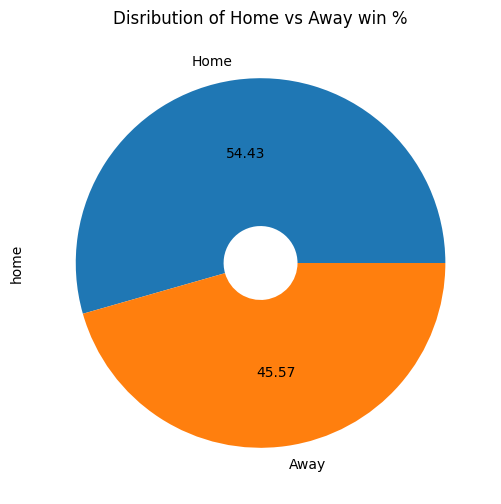

In [ ]:
plt.figure(figsize=(6, 6))

ipl_df['home'].value_counts(normalize = True).plot(
    kind = 'pie',
    autopct = '%.2f',
    labels = ['Home', 'Away'],
    wedgeprops = dict(width = 0.8))                          # Adjusting the width to create a hole

plt.title('Disribution of Home vs Away win %')
plt.show()

### *The pie chart indicates that teams have won matches on their "Home Ground" approximately 54.43% of the time.*

## *Toss Winner and Match winner*

In [ ]:
ipl_df['toss_factor'] = np.where(ipl_df['toss_winner'] == ipl_df['winner'], 1, 0)

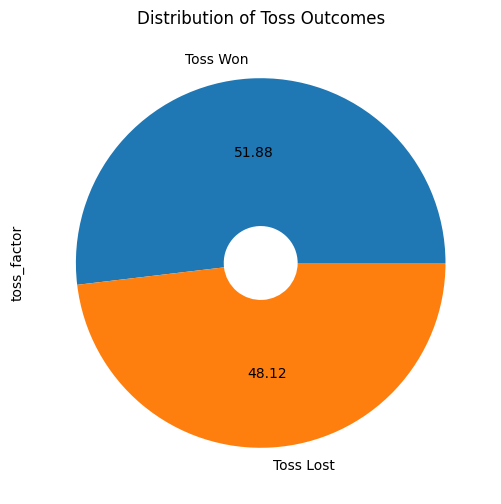

In [ ]:
plt.figure(figsize=(6, 6))

ipl_df['toss_factor'].value_counts().plot(
    kind='pie',
    autopct='%.2f',
    labels=['Toss Won', 'Toss Lost'],
    wedgeprops=dict(width=0.8))

plt.title('Distribution of Toss Outcomes')
plt.show()

### *We can observe from the above chart that teams winning the toss went on to win the match 51.88% of the time.*

## *Toss Decision - Batting or Fielding*

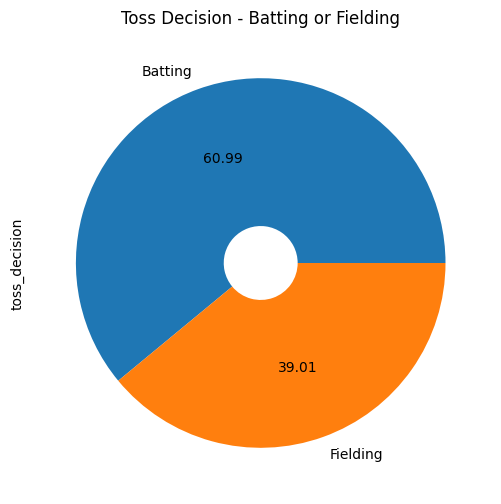

In [ ]:
plt.figure(figsize=(6, 6))

ipl_df['toss_decision'].value_counts().plot(
    kind='pie',
    autopct='%.2f',
    labels=['Batting', 'Fielding'],
    wedgeprops=dict(width=0.8))

plt.title('Toss Decision - Batting or Fielding')
plt.show()

### *From the above Pie Chart we can observe that teams have opted for Batting 60.99% of the time after winning the toss.*

## *Win % based on Toss decision - Batting or Fielding*

In [ ]:
# Counting the number of times a team that chose to field won the match
num_field_wins = ipl_df[(ipl_df['toss_decision'] == 'field') & (ipl_df['toss_winner'] == ipl_df['winner'])].shape[0]

# Counting the total number of matches where the toss decision was to field
total_field_matches = ipl_df[ipl_df['toss_decision'] == 'field'].shape[0]

# Calculating the percentage of times the team that chose to field won
field_win_percentage = num_field_wins / total_field_matches
print(field_win_percentage)

0.5503469996887074


In [ ]:
# Counting the number of times a team that chose to bat won the match
num_bat_wins = ipl_df[(ipl_df['toss_decision'] == 'bat') & (ipl_df['toss_winner'] == ipl_df['winner'])].shape[0]

# Counting the total number of matches where the toss decision was to bat
total_bat_matches = ipl_df[ipl_df['toss_decision'] == 'bat'].shape[0]

# Calculating the percentage of times the team that chose to bat won
bat_win_percentage = num_bat_wins / total_bat_matches
print(bat_win_percentage)


0.46959459459459457


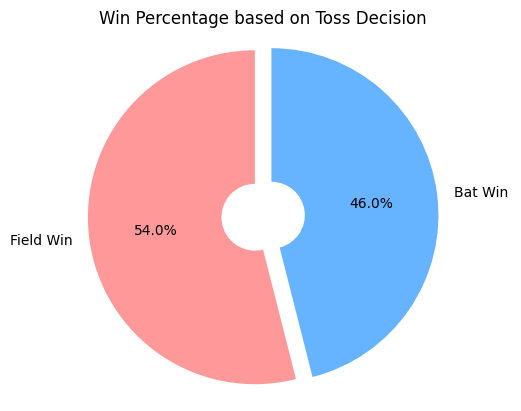

In [ ]:
labels = ['Field Win', 'Bat Win']
sizes = [field_win_percentage, bat_win_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.8))
ax1.axis('equal')

plt.title('Win Percentage based on Toss Decision')
plt.show()

### *The pie chart clearly indicates that teams who opted for "Fielding" after winning the toss have secured the highest number of victories.*

## *OBSERVATIONS -*


*   Mumbai Indians is the most successful team in IPL.


*   Virat Kohli, Chris Gayle, ABD Villiers, David Warner, Suresh Raina are the most successful and popular batsman in IPL.


*   DJ Bravo, Bhuvneshwar Kumar, Lasith Malinga are the most effective and successful bowlers in IPL cricket
*   Opting to field first after winning the toss is a good strategy to secure victory according to the analysis.


*   The analysis suggest that the outcome of the toss and the advantage of playing on home ground have shown limited influence on team performance.









## *BUSINESS INFERENCE -*



1. Companies may consider endorsing teams such as Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders as they have won multiple IPL trophies.

2. Companies may also consider endorsing players like Virat Kohli, Chris Gayle, Rohit Sharma, Ravindra Jadeja, Suresh Raina, Bhuvneshwar kumar, ABD Villiers, David Warner as they have proven themselves as succesfull IPL players.

